In [19]:
library(sophisthse)
library(ggplot2)
library(forecast)
library(uroot)
library(urca)

In [26]:
library(uroot)


In [27]:
packageVersion('uroot')

[1] ‘2.0.9’

In [ ]:
library(lmtest)
library(dplyr)
library(broom)
library(strucchange)
library(tseries)
library(readxl)
library(TSA)
library(car)
library(zoo)
library(vars)

In [10]:
# gdp1 <- sophisthse("GDP_Q_I") # скачаем Индекс реального ВВП (GDP_Q_DIRI) с 2000.1 по 2002.4
gdp2 <- sophisthse("GDPEA_Q") # скачаем Индекс реального ВВП согласно ОКВЭД (GDPEA_Q_DIRI) с 2003.1 по 2019.1 
gdp <-  ts(data = gdp2[1:65, "GDPEA_Q_DIRI"], start = c(2003,1), frequency = 4 )  # собрали в один ряд 

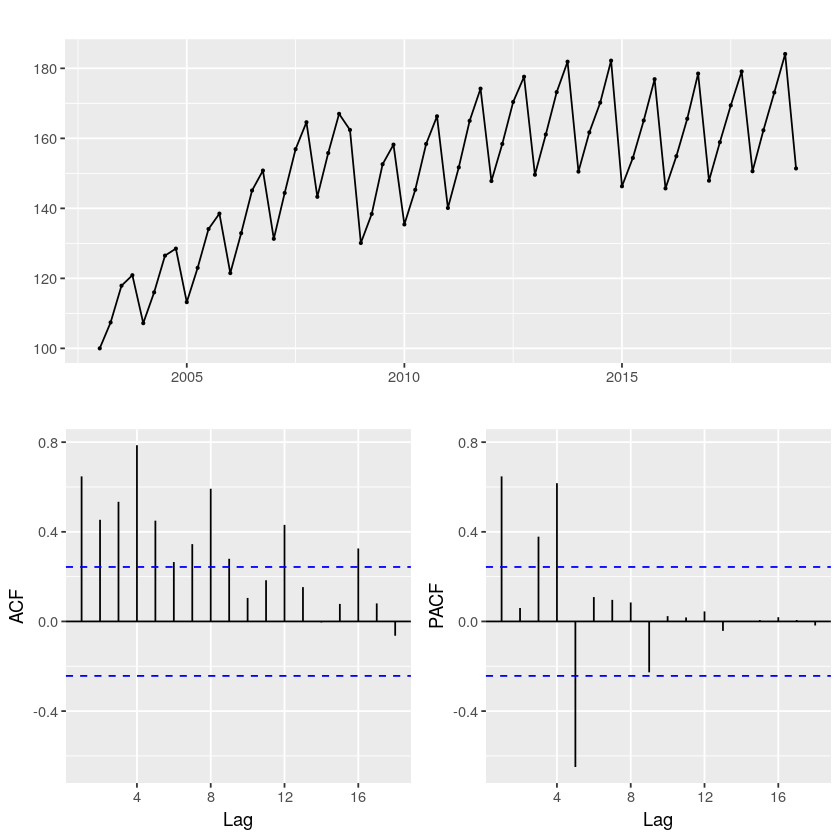

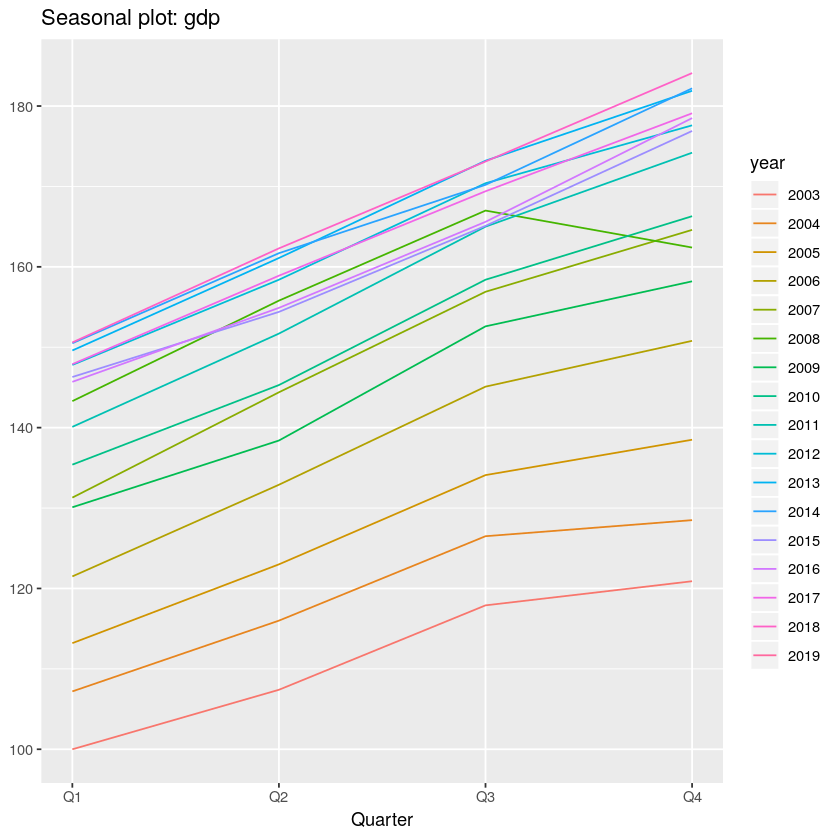

In [56]:
ggtsdisplay(gdp, main="") 
ggseasonplot(gdp)  

In [12]:
inv1 <- sophisthse("INVFC_Q") # скачаем Инвестиции в основной капитал (INVFC_Q)  с 2000.1 по 2019.1 
inv <- ts(data = inv1[29:105] , start = c(2000,1), frequency = 4) 

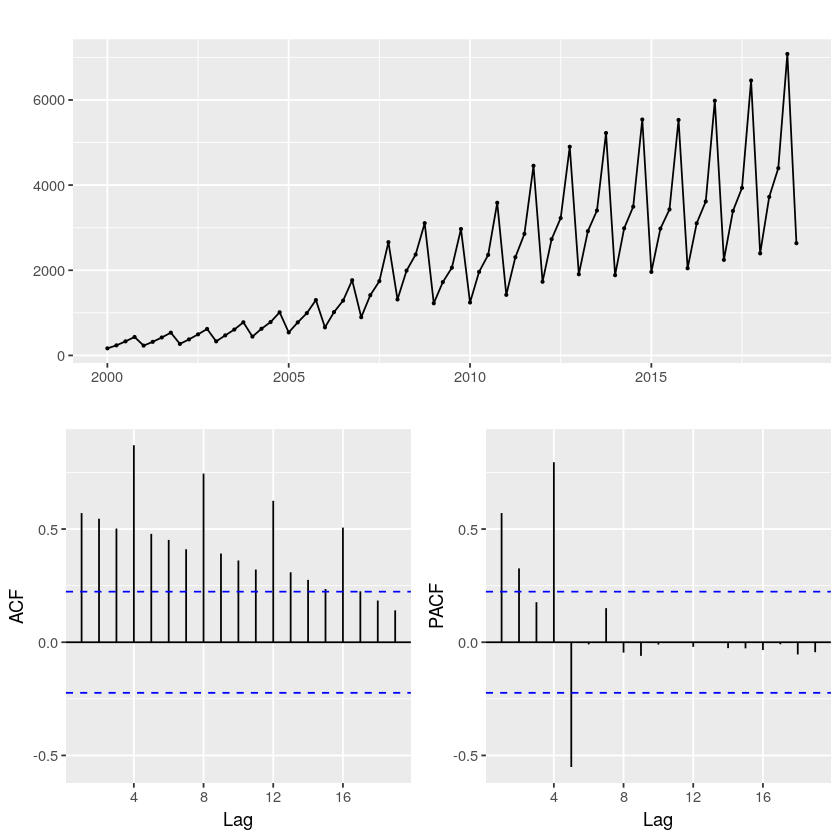

In [13]:
ggtsdisplay(inv, main="") 

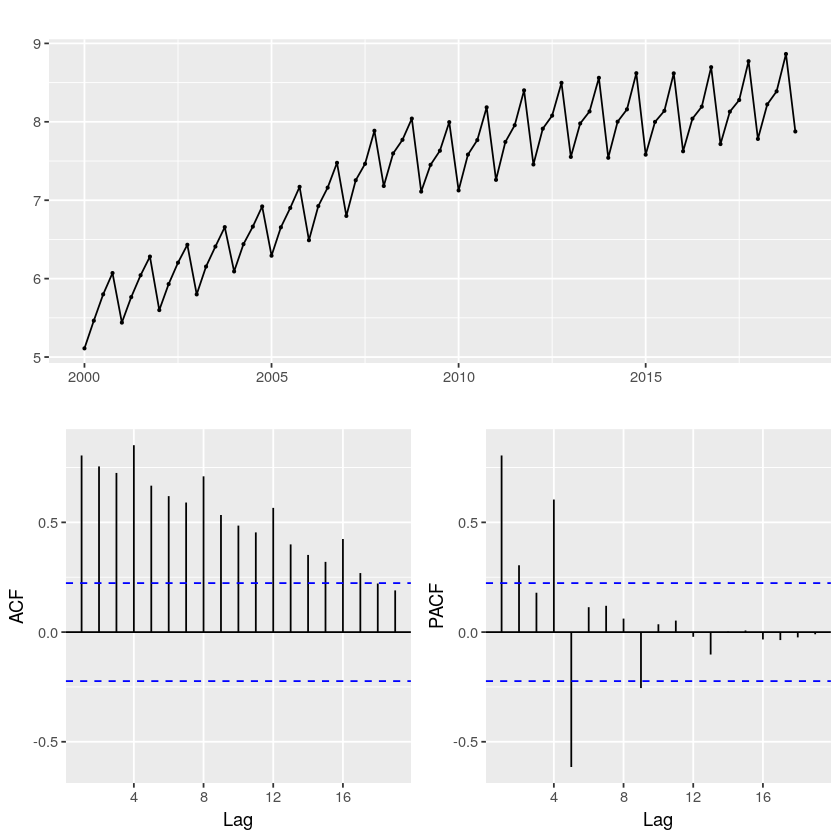

In [49]:
inv_log <- log(inv)
ggtsdisplay(inv_log, main="")

In [50]:
# проведем тест Дики-Фуллера на единичный корень
summary(ur.df(gdp)) 
summary(ur.df(inv_log))


############################################### 
# Augmented Dickey-Fuller Test Unit Root Test # 
############################################### 

Test regression none 


Call:
lm(formula = z.diff ~ z.lag.1 - 1 + z.diff.lag)

Residuals:
    Min      1Q  Median      3Q     Max 
-33.782  -7.567   6.725  12.690  16.103 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)  
z.lag.1     0.001787   0.013204   0.135   0.8928  
z.diff.lag -0.259125   0.129153  -2.006   0.0493 *
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 15.84 on 61 degrees of freedom
Multiple R-squared:  0.06214,	Adjusted R-squared:  0.03139 
F-statistic: 2.021 on 2 and 61 DF,  p-value: 0.1413


Value of test-statistic is: 0.1353 

Critical values for test statistics: 
     1pct  5pct 10pct
tau1 -2.6 -1.95 -1.61



############################################### 
# Augmented Dickey-Fuller Test Unit Root Test # 
############################################### 

Test regression none 


Call:
lm(formula = z.diff ~ z.lag.1 - 1 + z.diff.lag)

Residuals:
    Min      1Q  Median      3Q     Max 
-0.8627 -0.3185  0.2995  0.3904  0.5313 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
z.lag.1     0.005722   0.007308   0.783    0.436    
z.diff.lag -0.488739   0.106085  -4.607 1.69e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.4646 on 73 degrees of freedom
Multiple R-squared:  0.2256,	Adjusted R-squared:  0.2044 
F-statistic: 10.63 on 2 and 73 DF,  p-value: 8.863e-05


Value of test-statistic is: 0.783 

Critical values for test statistics: 
     1pct  5pct 10pct
tau1 -2.6 -1.95 -1.61


In [51]:
# проведем тест Дики-Фуллера на единичный корень
summary(ur.df(gdp, type='trend', lags = 8,  selectlags = "BIC")) 
summary(ur.df(inv_log, type='trend', lags = 8, selectlags = "BIC"))


############################################### 
# Augmented Dickey-Fuller Test Unit Root Test # 
############################################### 

Test regression trend 


Call:
lm(formula = z.diff ~ z.lag.1 + 1 + tt + z.diff.lag)

Residuals:
    Min      1Q  Median      3Q     Max 
-9.1429 -1.6480  0.5447  1.8864  3.9516 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 22.63750    8.13341   2.783 0.007674 ** 
z.lag.1     -0.15695    0.06262  -2.506 0.015646 *  
tt           0.06320    0.04999   1.264 0.212311    
z.diff.lag1  0.31599    0.11389   2.774 0.007855 ** 
z.diff.lag2 -0.16466    0.07579  -2.173 0.034771 *  
z.diff.lag3 -0.22984    0.06989  -3.288 0.001891 ** 
z.diff.lag4  0.77503    0.06810  11.380 3.11e-15 ***
z.diff.lag5 -0.45456    0.12614  -3.604 0.000744 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.827 on 48 degrees of freedom
Multiple R-squared:  0.9753,	Adjusted R-squared:  0.9717 


############################################### 
# Augmented Dickey-Fuller Test Unit Root Test # 
############################################### 

Test regression trend 


Call:
lm(formula = z.diff ~ z.lag.1 + 1 + tt + z.diff.lag)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.128092 -0.025217  0.002077  0.022474  0.134754 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.2747145  0.1461879   1.879 0.065078 .  
z.lag.1     -0.0370339  0.0247153  -1.498 0.139267    
tt           0.0006465  0.0009583   0.675 0.502472    
z.diff.lag1  0.2894346  0.1096236   2.640 0.010544 *  
z.diff.lag2 -0.1613251  0.0594732  -2.713 0.008699 ** 
z.diff.lag3 -0.1869219  0.0579291  -3.227 0.002030 ** 
z.diff.lag4  0.8283258  0.0572267  14.474  < 2e-16 ***
z.diff.lag5 -0.4553152  0.1150983  -3.956 0.000204 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.0434 on 60 degrees of freedom
Multiple R-squared

In [52]:
hegy.test(gdp,  deterministic = c(1,1,1))
hegy.test(inv_log,  deterministic = c(1,1,1))


	HEGY test for unit roots

data:  gdp

      statistic p-value    
t_1     -2.0745  0.4917    
t_2     -2.4304  0.1016    
F_3:4   26.2585       0 ***
F_2:4   30.5338       0 ***
F_1:4   25.1247       0 ***
---
Signif. codes: 0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1 

Deterministic terms: constant + trend + seasonal dummies 
Lag selection criterion and order: fixed, 0
P-values: based on response surface regressions 


	HEGY test for unit roots

data:  inv_log

      statistic p-value    
t_1     -0.7238  0.9665    
t_2     -1.6464  0.4153    
F_3:4   28.2926       0 ***
F_2:4   22.5604       0 ***
F_1:4   17.0894       0 ***
---
Signif. codes: 0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1 

Deterministic terms: constant + trend + seasonal dummies 
Lag selection criterion and order: fixed, 0
P-values: based on response surface regressions 

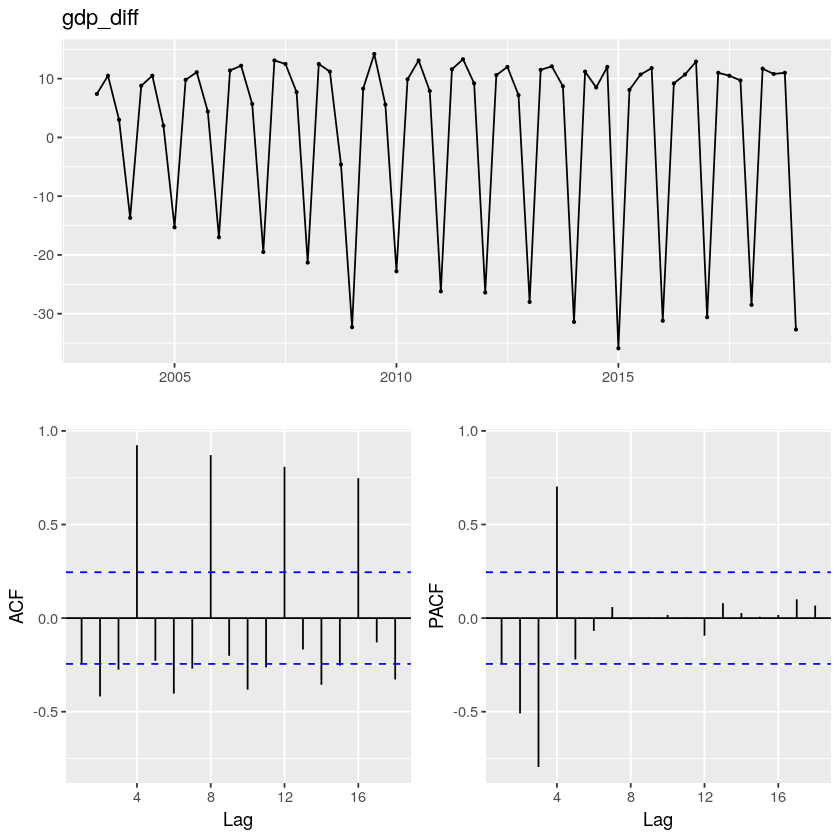

In [57]:
gdp_diff <- diff(gdp) # взяв первую разность, мы не решили проблему с нестационарностью, остался сезонный едичный корень 
ggtsdisplay(gdp_diff)

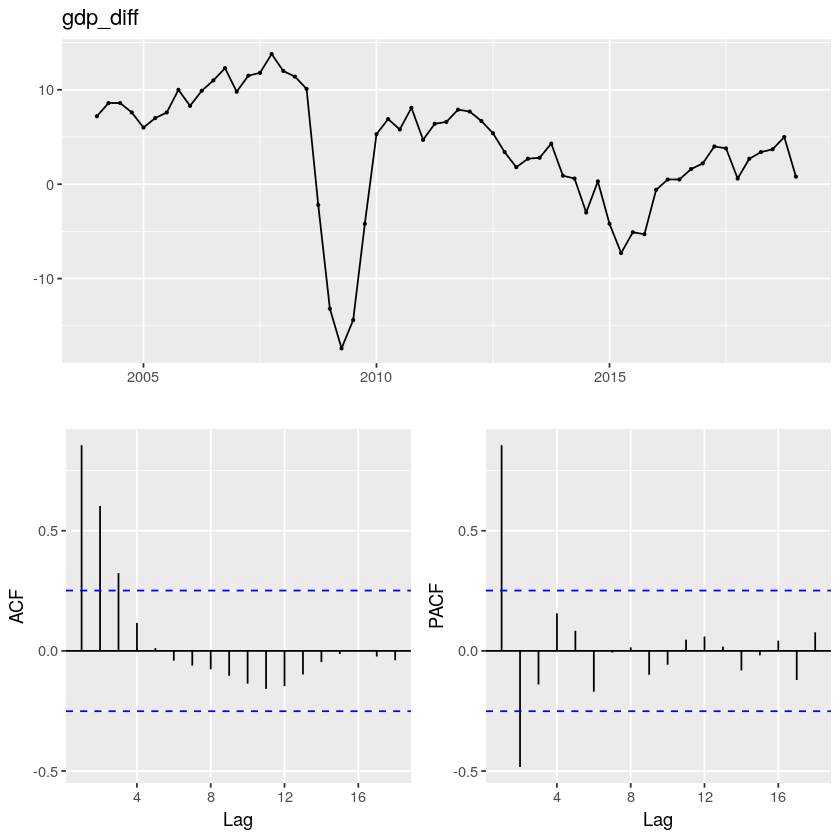

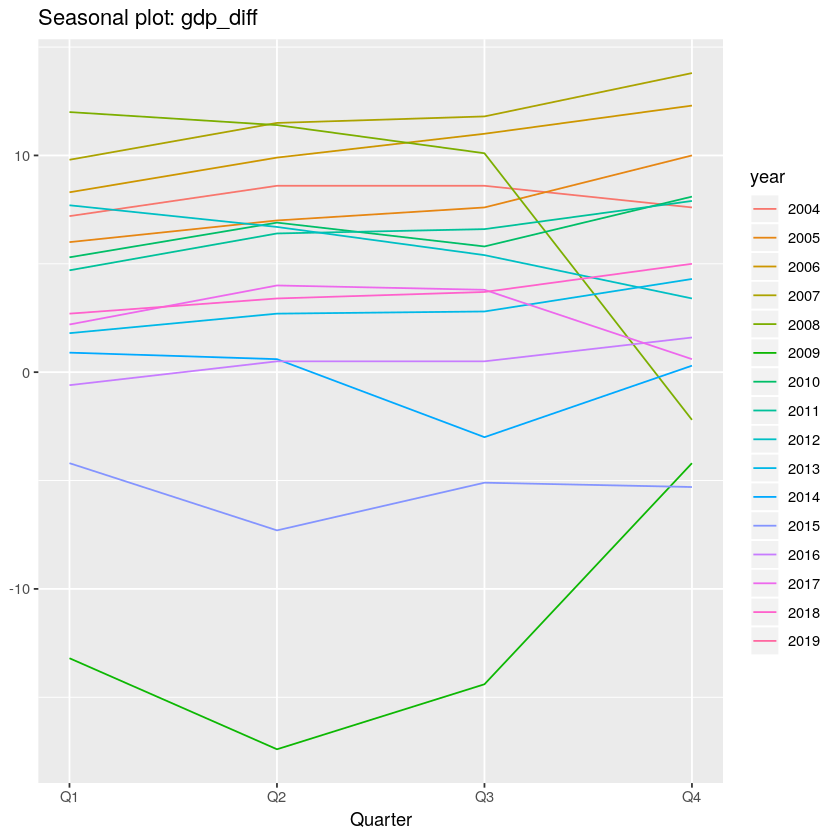

In [84]:
gdp_diff <- diff(gdp, 4)
ggtsdisplay(gdp_diff)
ggseasonplot(gdp_diff)  

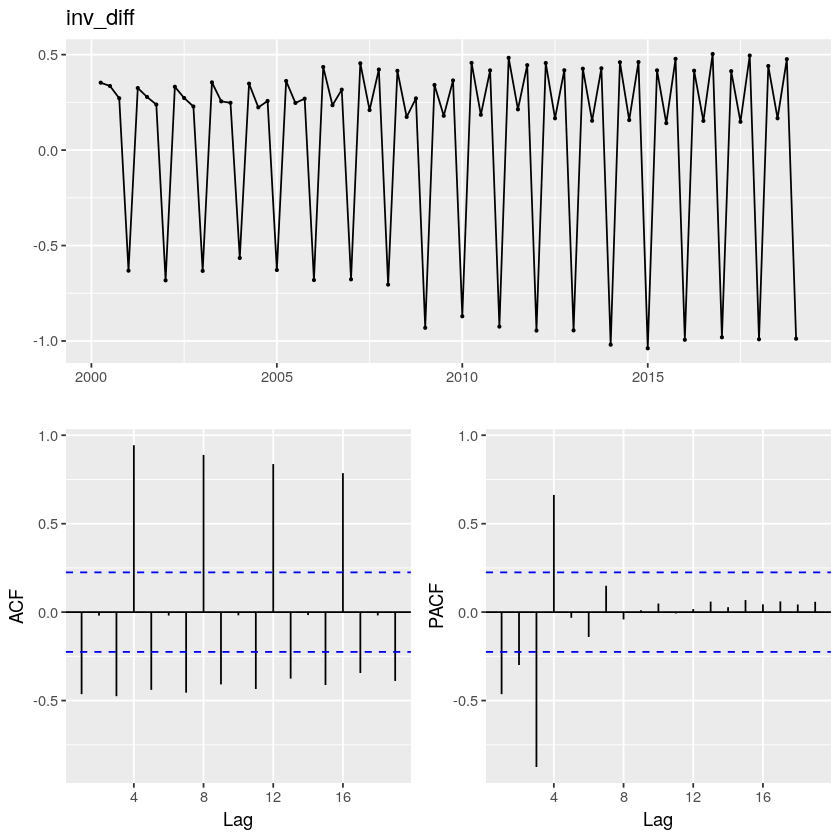

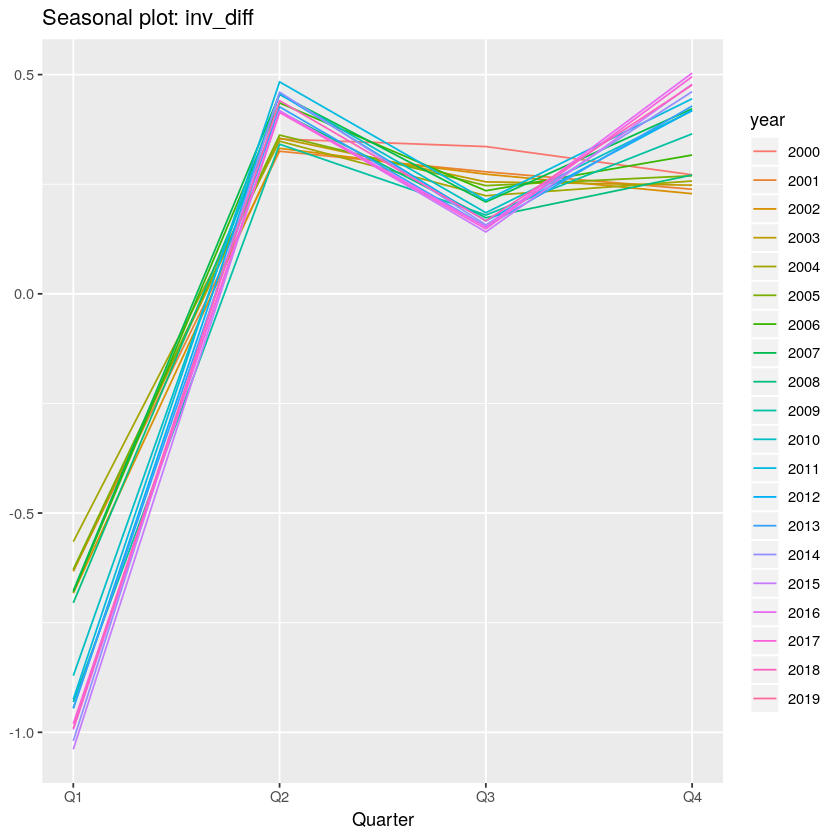

In [69]:
inv_diff <- diff(inv_log) # взяв первую разность, мы не решили проблему с нестационарностью, остался сезонный едичный корень 
ggtsdisplay(inv_diff) 
ggseasonplot(inv_diff)  

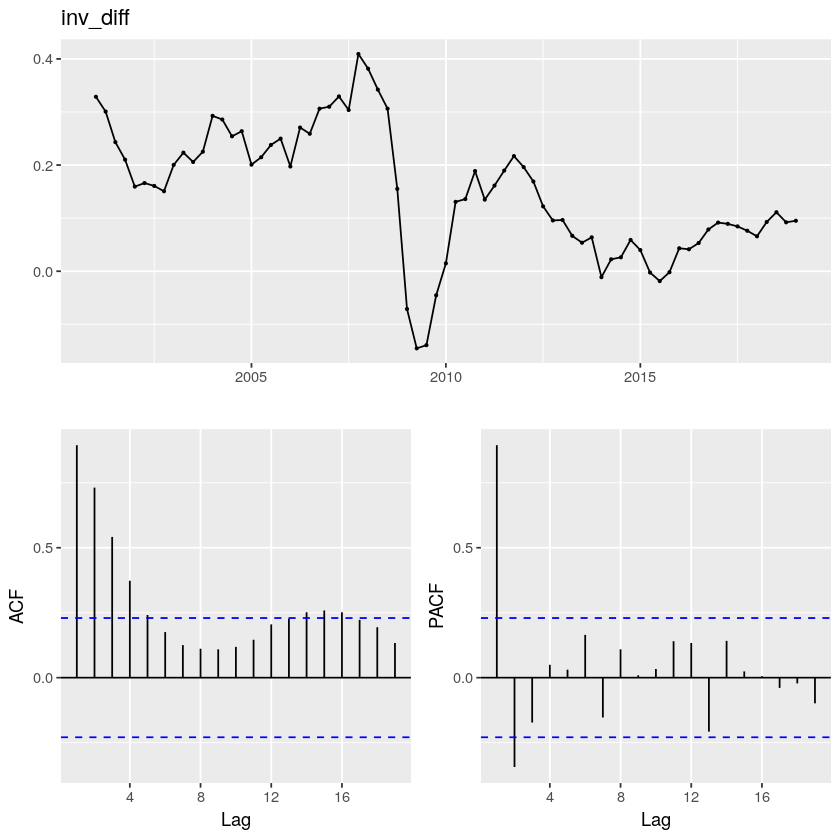

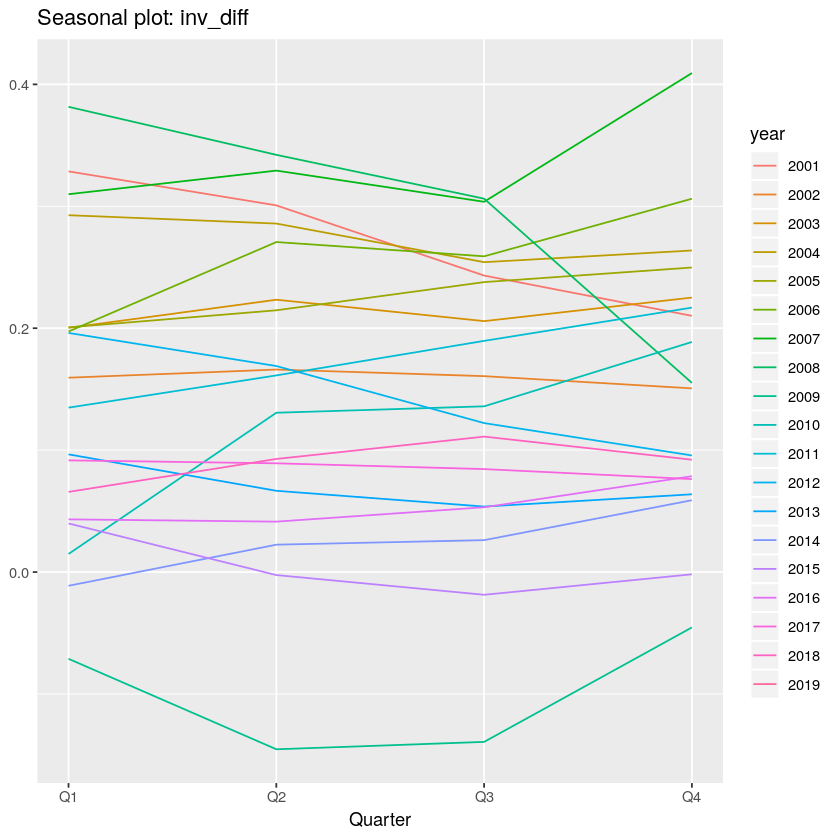

In [80]:
inv_diff <- diff(inv_log, 4)
ggtsdisplay(inv_diff)
ggseasonplot(inv_diff)  

In [85]:
model_gdp <- auto.arima(gdp) 
summary(model_gdp)

Series: gdp 
ARIMA(1,1,0)(1,1,0)[4] 

Coefficients:
         ar1     sar1
      0.3496  -0.2886
s.e.  0.1237   0.1237

sigma^2 estimated as 9.279:  log likelihood=-151.18
AIC=308.36   AICc=308.79   BIC=314.65

Training set error measures:
                      ME     RMSE      MAE         MPE     MAPE      MASE
Training set -0.09749862 2.877392 2.019903 -0.08861432 1.344528 0.3255326
                    ACF1
Training set 0.006386214


In [86]:
model_gdp <- auto.arima(gdp_diff) 
summary(model_gdp)

Series: gdp_diff 
ARIMA(1,1,0)(1,0,0)[4] 

Coefficients:
         ar1     sar1
      0.3496  -0.2886
s.e.  0.1237   0.1237

sigma^2 estimated as 9.278:  log likelihood=-151.18
AIC=308.36   AICc=308.79   BIC=314.65

Training set error measures:
                     ME     RMSE      MAE      MPE     MAPE      MASE
Training set -0.1017804 2.970079 2.146576 13.39978 104.2717 0.4101738
                    ACF1
Training set 0.006924288


In [91]:
# проведем тест Дики-Фуллера на единичный корень
summary(ur.df(gdp_diff, type='none', lags = 8,  selectlags = "BIC")) 
summary(ur.df(inv_diff, type='none', lags = 8, selectlags = "BIC"))


############################################### 
# Augmented Dickey-Fuller Test Unit Root Test # 
############################################### 

Test regression none 


Call:
lm(formula = z.diff ~ z.lag.1 - 1 + z.diff.lag)

Residuals:
    Min      1Q  Median      3Q     Max 
-9.7700 -0.9336  0.5602  2.4034  6.0184 

Coefficients:
           Estimate Std. Error t value Pr(>|t|)    
z.lag.1    -0.18601    0.05935  -3.134 0.002883 ** 
z.diff.lag  0.50103    0.12187   4.111 0.000146 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.087 on 50 degrees of freedom
Multiple R-squared:  0.3074,	Adjusted R-squared:  0.2797 
F-statistic: 11.09 on 2 and 50 DF,  p-value: 0.0001029


Value of test-statistic is: -3.1341 

Critical values for test statistics: 
     1pct  5pct 10pct
tau1 -2.6 -1.95 -1.61



############################################### 
# Augmented Dickey-Fuller Test Unit Root Test # 
############################################### 

Test regression none 


Call:
lm(formula = z.diff ~ z.lag.1 - 1 + z.diff.lag)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.161373 -0.015071  0.004721  0.031064  0.132721 

Coefficients:
           Estimate Std. Error t value Pr(>|t|)   
z.lag.1    -0.05831    0.03239  -1.800   0.0767 . 
z.diff.lag  0.36981    0.11632   3.179   0.0023 **
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.04816 on 62 degrees of freedom
Multiple R-squared:  0.1631,	Adjusted R-squared:  0.1361 
F-statistic: 6.041 on 2 and 62 DF,  p-value: 0.004008


Value of test-statistic is: -1.8002 

Critical values for test statistics: 
     1pct  5pct 10pct
tau1 -2.6 -1.95 -1.61


In [93]:
model_gdp <- Arima(gdp, order = c(1,0,1), seasonal = c(0,1,0),  include.drift=F,  method = "ML")
summary(model_gdp)

Series: gdp 
ARIMA(1,0,1)(0,1,0)[4] 

Coefficients:
         ar1     ma1
      0.8278  0.3862
s.e.  0.0719  0.1059

sigma^2 estimated as 9.478:  log likelihood=-155.07
AIC=316.13   AICc=316.55   BIC=322.47

Training set error measures:
                    ME     RMSE      MAE       MPE     MAPE      MASE
Training set 0.3870376 2.933141 2.072323 0.2631711 1.390768 0.3339807
                   ACF1
Training set 0.08510262



	Ljung-Box test

data:  Residuals from ARIMA(1,0,1)(0,1,0)[4]
Q* = 10.098, df = 6, p-value = 0.1206

Model df: 2.   Total lags used: 8



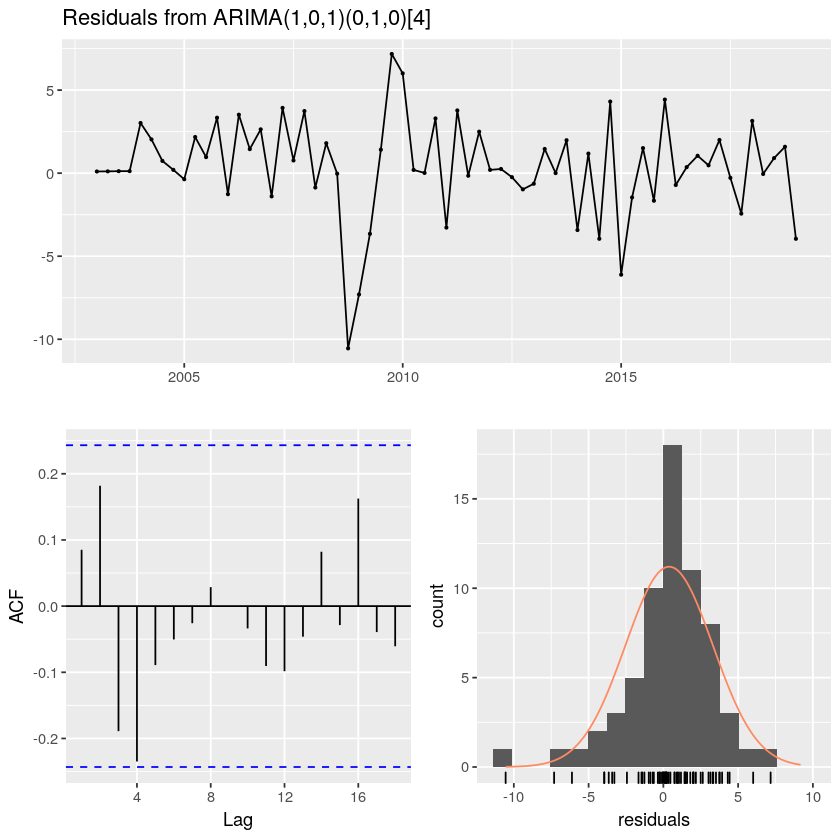

In [94]:
checkresiduals(model_gdp)

        Point Forecast    Lo 80    Hi 80    Lo 95    Hi 95
2019 Q2       161.4359 157.4904 165.3814 155.4018 167.4700
2019 Q3       172.3847 166.1793 178.5902 162.8943 181.8752
2019 Q4       183.5079 176.1441 190.8718 172.2459 194.7700
2020 Q1       150.9099 142.8479 158.9720 138.5801 163.2397
2020 Q2       161.0302 150.5718 171.4887 145.0354 177.0250
2020 Q3       172.0489 159.4427 184.6552 152.7694 191.3285
2020 Q4       183.2300 169.3426 197.1173 161.9911 204.4689
2021 Q1       150.6798 135.9790 165.3807 128.1968 173.1629

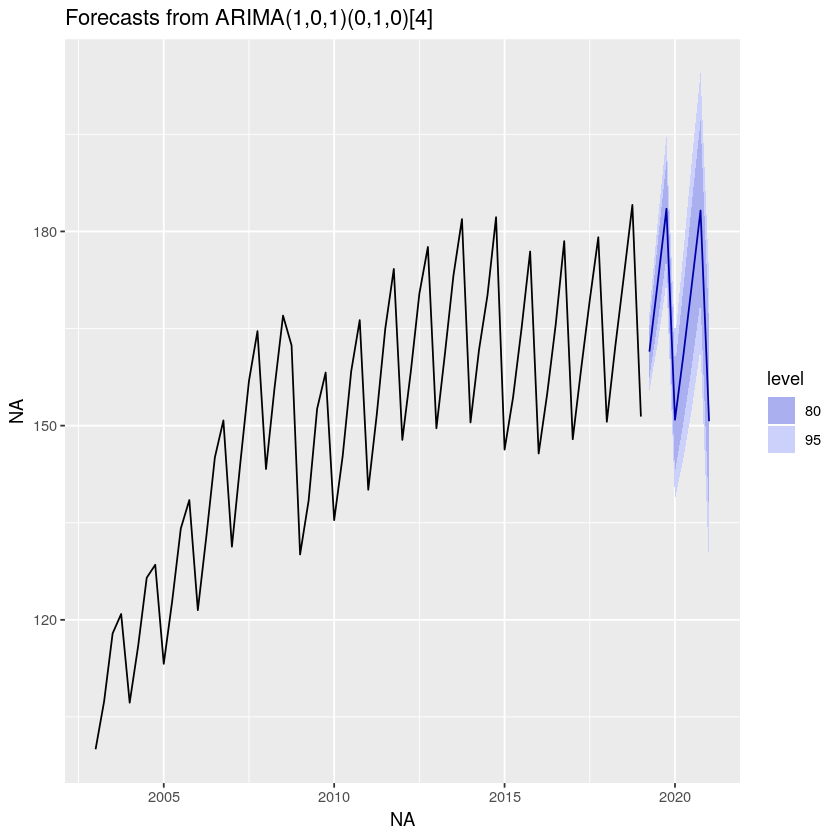

In [101]:
future_gdp <- forecast(model_gdp, h = 8)
future_gdp
autoplot(future_gdp)

In [102]:
model_inv <- auto.arima(inv_log) 
summary(model_inv)

Series: inv_log 
ARIMA(2,1,2)(0,1,1)[4] 

Coefficients:
          ar1      ar2     ma1     ma2     sma1
      -1.0860  -0.2449  1.4540  0.8254  -0.4212
s.e.   0.1578   0.1564  0.0981  0.0911   0.1189

sigma^2 estimated as 0.001927:  log likelihood=124.79
AIC=-237.59   AICc=-236.3   BIC=-223.93

Training set error measures:
                    ME       RMSE        MAE         MPE      MAPE      MASE
Training set -0.003717 0.04095046 0.02838739 -0.05791112 0.3923652 0.1759499
                     ACF1
Training set -0.007215888


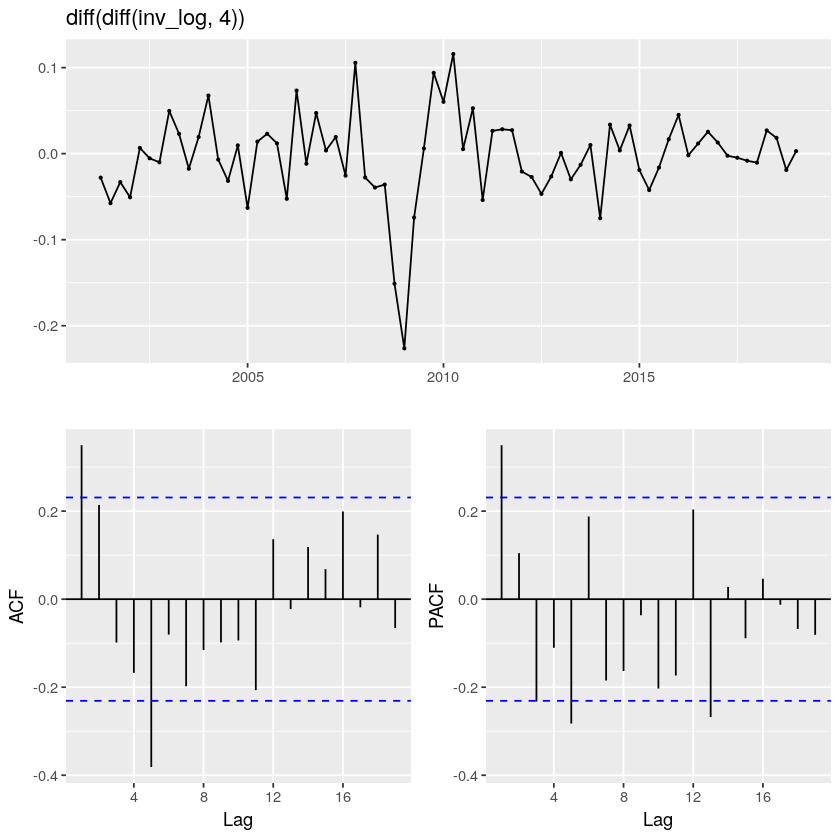

In [112]:
ggtsdisplay(diff(diff(inv_log,4))) # тест на 1 корень  показал, что надо брать первую разность, но по полученнным ACF, PACF, можно предположить, что это ARMA(1,1), но лучше модель будет подобранная по auto.arima ARMA(2,2)SARMA(0,1) (лучше по качеству остатков)  

In [132]:
model_inv <- auto.arima(inv_log) 
summary(model_inv)

Series: inv_log 
ARIMA(2,1,2)(0,1,1)[4] 

Coefficients:
          ar1      ar2     ma1     ma2     sma1
      -1.0860  -0.2449  1.4540  0.8254  -0.4212
s.e.   0.1578   0.1564  0.0981  0.0911   0.1189

sigma^2 estimated as 0.001927:  log likelihood=124.79
AIC=-237.59   AICc=-236.3   BIC=-223.93

Training set error measures:
                    ME       RMSE        MAE         MPE      MAPE      MASE
Training set -0.003717 0.04095046 0.02838739 -0.05791112 0.3923652 0.1759499
                     ACF1
Training set -0.007215888


In [107]:
model_inv <- auto.arima(inv_diff) 
summary(model_inv)

Series: inv_diff 
ARIMA(2,1,2)(0,0,1)[4] 

Coefficients:
          ar1      ar2     ma1     ma2     sma1
      -1.0860  -0.2449  1.4540  0.8253  -0.4212
s.e.   0.1578   0.1564  0.0981  0.0911   0.1189

sigma^2 estimated as 0.001925:  log likelihood=124.79
AIC=-237.59   AICc=-236.3   BIC=-223.93

Training set error measures:
                       ME       RMSE        MAE      MPE     MAPE      MASE
Training set -0.003829135 0.04203422 0.02969981 43.51068 76.98894 0.3448568
                     ACF1
Training set -0.009485202


In [128]:
model_inv <- Arima(inv_log, order = c(2, 1, 1), seasonal = c(0, 1, 1), lambda = 0 )
summary(model_inv)

Series: inv_log 
ARIMA(2,1,1)(0,1,1)[4] 
Box Cox transformation: lambda= 0 

Coefficients:
         ar1      ar2      ma1    sma1
      1.3013  -0.4921  -0.9053  0.0730
s.e.  0.1151   0.1271   0.0598  0.2199

sigma^2 estimated as 3.997e-05:  log likelihood=264.34
AIC=-518.68   AICc=-517.78   BIC=-507.3

Training set error measures:
                      ME       RMSE        MAE        MPE      MAPE      MASE
Training set -0.00778678 0.04315504 0.03115819 -0.1124125 0.4324637 0.1931238
                    ACF1
Training set -0.08536322



	Ljung-Box test

data:  Residuals from ARIMA(2,1,1)(0,1,1)[4]
Q* = 14.684, df = 4, p-value = 0.005404

Model df: 4.   Total lags used: 8



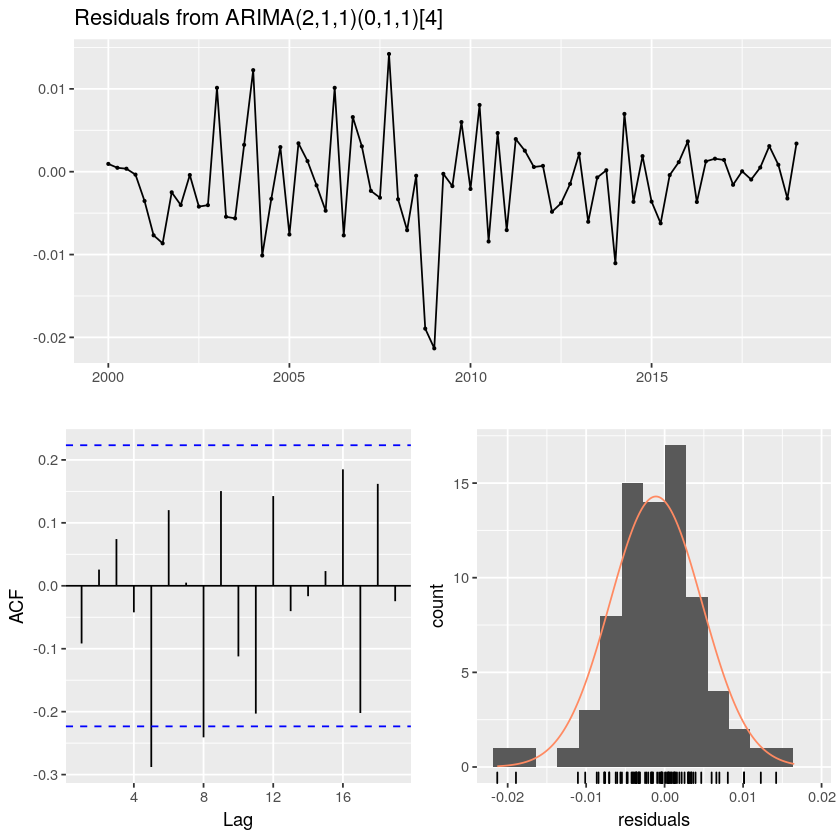

In [129]:
checkresiduals(model_inv)

        Point Forecast    Lo 80    Hi 80    Lo 95    Hi 95
2019 Q2       8.328750 8.261541 8.396504 8.226183 8.432594
2019 Q3       8.497245 8.379841 8.616293 8.318349 8.679987
2019 Q4       8.973685 8.813165 9.137129 8.729357 9.224852
2020 Q1       7.970049 7.806645 8.136872 7.721505 8.226592
2020 Q2       8.423915 8.201013 8.652876 8.085413 8.776589
2020 Q3       8.591325 8.314752 8.877099 8.171965 9.032206
2020 Q4       9.070795 8.739915 9.414201 8.569672 9.601221
2021 Q1       8.055090 7.737866 8.385319 7.575026 8.565577

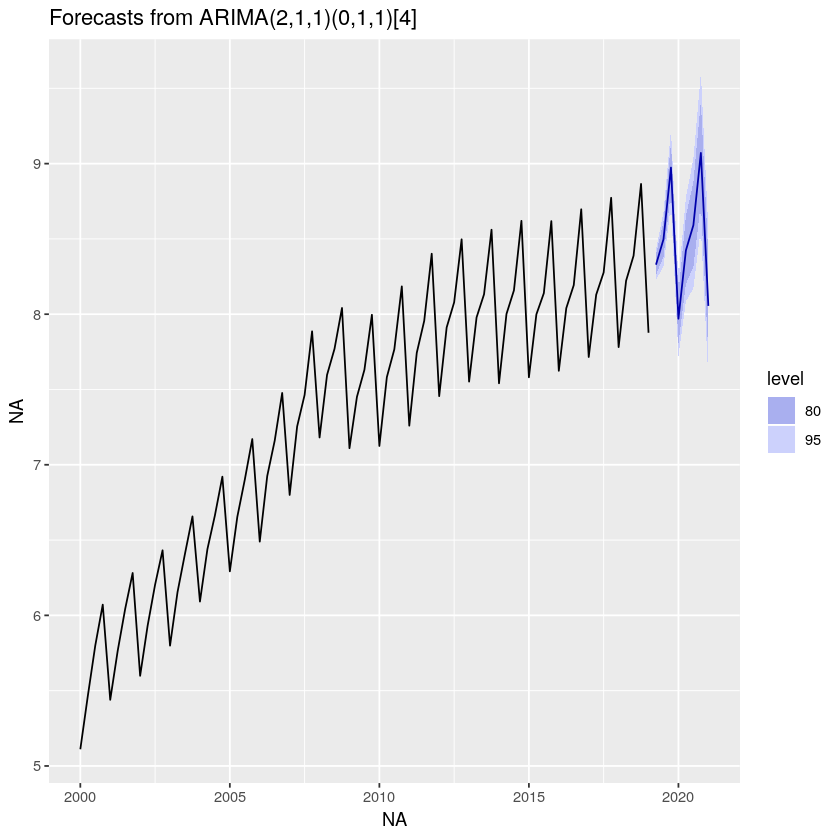

In [130]:
future_inv <- forecast(model_inv, h = 8)
future_inv
autoplot(future_inv)